# **Housing Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('/content/drive/My Drive/Mini Project DS/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.shape

(5000, 7)

In [4]:
data.isnull().any()

Avg. Area Income                False
Avg. Area House Age             False
Avg. Area Number of Rooms       False
Avg. Area Number of Bedrooms    False
Area Population                 False
Price                           False
Address                         False
dtype: bool

In [5]:
X_income=data.iloc[:,0].values
X_income

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367])

In [6]:
X_house_age=data.iloc[:,1].values
X_no_of_rooms=data.iloc[:,2].values
X_no_pop=data.iloc[:,4].values
X_no_of_bed_rooms=data.iloc[:,3].values
X=data.iloc[:,:5].values
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [7]:
y=data.iloc[:,5].values
Y=data.iloc[:,5]

In [8]:
data.iloc[:,5].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

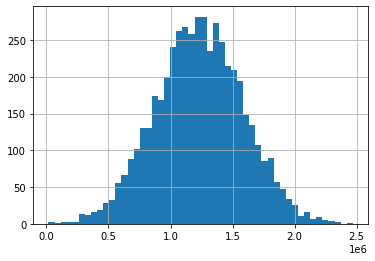

In [9]:
data['Price'].hist(bins=50)

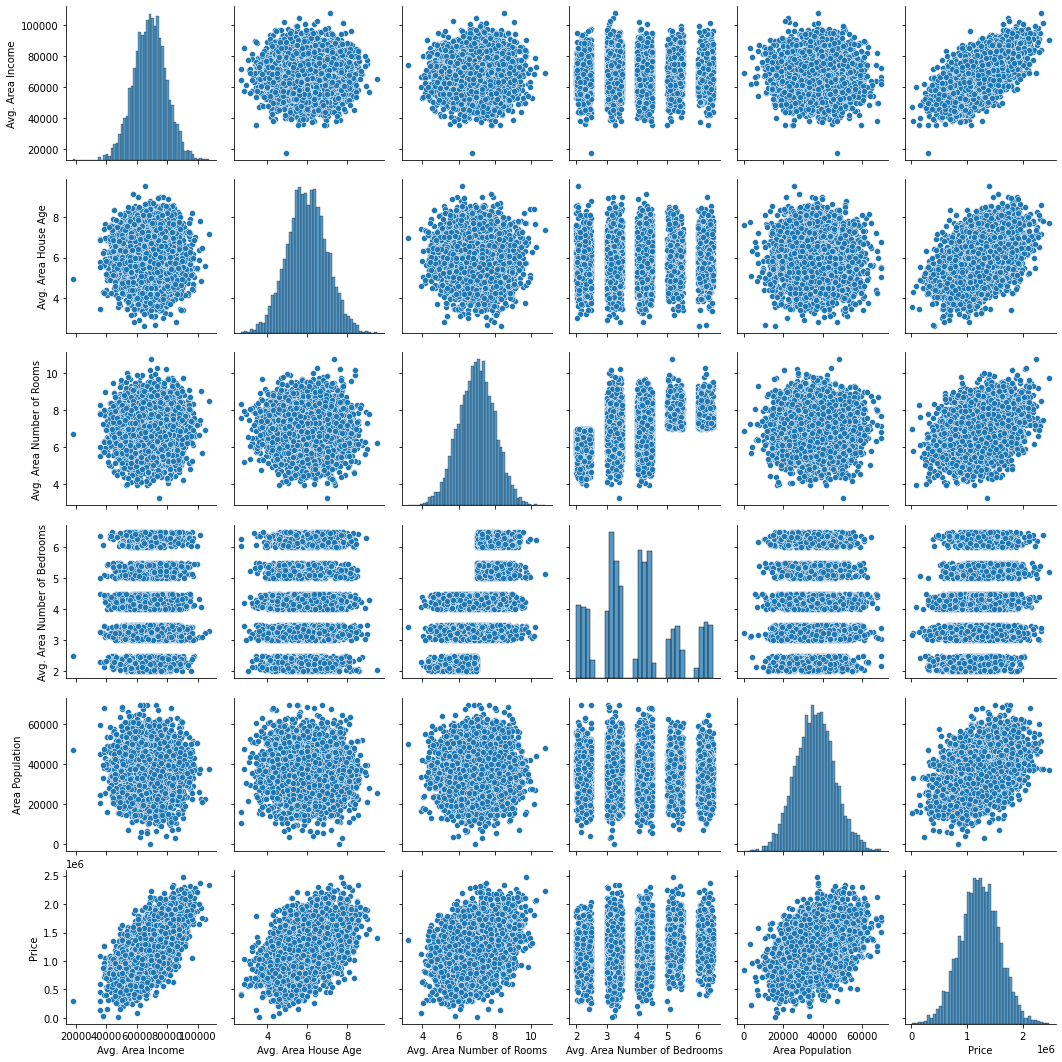

In [10]:
sns.pairplot(data)

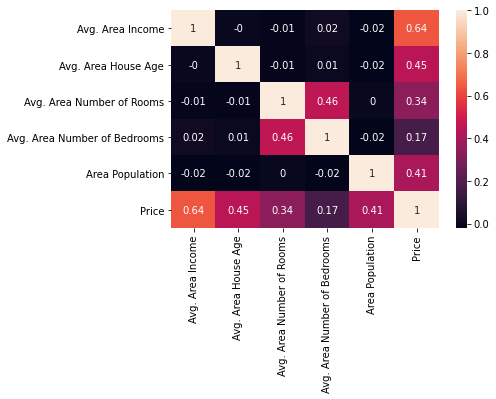

In [11]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix,  annot=True)


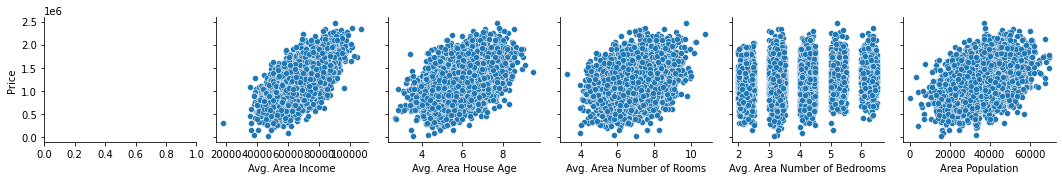

In [12]:
sns.pairplot(data,
             y_vars=['Price'],
             x_vars=['','Avg. Area Income',
             'Avg. Area House Age',
             'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms',
             'Area Population'],)

X_train=[79095.27923038 60325.98587645 68061.81429892 ... 72488.15969029
 88508.05347528 71146.48932708]
y_train=[1476392.55075533 1364306.768681   1255736.40858762 ... 1450393.53041457
 1660295.79595833 1077754.22596212]

Coefficient of variance: [21.19642535]
Intercept: -217378.03405030887

Score for the Training Set: 0.4133324283348767
Score for the Validating Set: 1.0



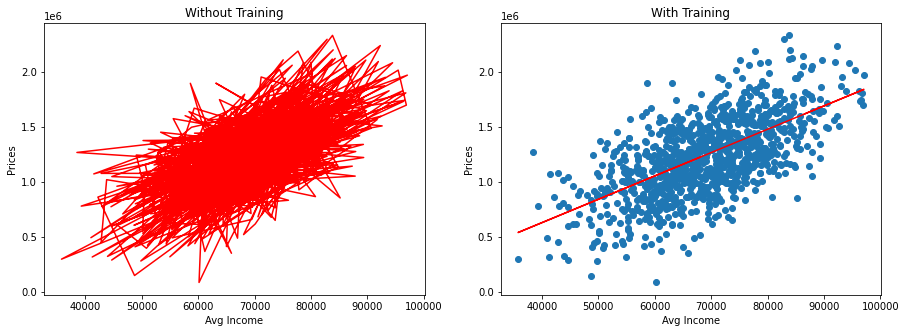

In [13]:
from sklearn.model_selection import train_test_split
X_train_income,X_test_income,y_train_income,y_test_income=train_test_split(
    X_income,
    y,
    test_size=0.2,
    random_state=3) 
print('X_train={}'.format(X_train_income))
print('y_train={}'.format(y_train_income))
print()

# fitting the model 
from sklearn.linear_model import LinearRegression
re=LinearRegression()
X_train_income=X_train_income.reshape(-1,1)
re.fit(X_train_income,y_train_income)

print('Coefficient of variance:',re.coef_)
print('Intercept:',re.intercept_)
print()
print('Score for the Training Set:', re.score(X_train_income,y_train_income))

# predicting the output for the taken test set
X_test_income=X_test_income.reshape(-1,1)
y_pred_income=re.predict(X_test_income)

print('Score for the Validating Set:', re.score(X_test_income,y_pred_income))
print()

# Visualisatioin
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
plt.plot(X_test_income,y_test_income,color='red')
plt.xlabel('Avg Income')
plt.ylabel('Prices')
plt.title('Without Training')


plt.subplot(1, 2, 2)
plt.scatter(X_test_income,y_test_income)
plt.plot(X_test_income,y_pred_income,color='red')
plt.xlabel('Avg Income')
plt.ylabel('Prices')
plt.title('With Training')
plt.show()


X_train=[6.66680887 6.81245207 5.77691241 ... 5.64363914 6.41739743 6.65175544]
y_train=[1476392.55075533 1364306.768681   1255736.40858762 ... 1450393.53041457
 1660295.79595833 1077754.22596212]

Coefficient of variance: [159847.70732123]
Intercept: 277101.13525260286

Score for the Training Set: 0.20157783435457866
Score for the Validating Set: 1.0



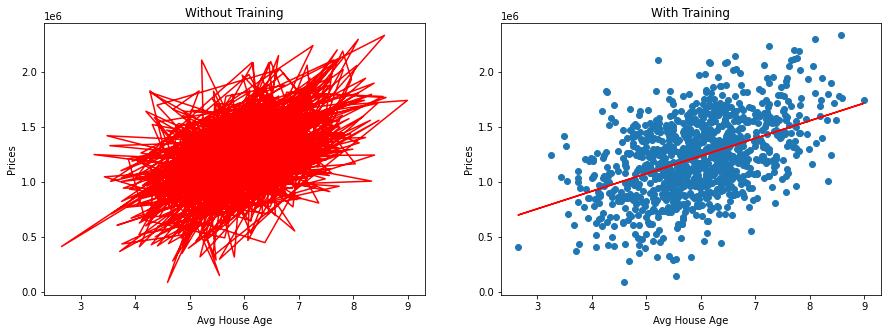

In [15]:

X_train_house_age,X_test_house_age,y_train_house_age,y_test_house_age=train_test_split(
    X_house_age,
    y,
    test_size=0.2,
    random_state=3) 
print('X_train={}'.format(X_train_house_age))
print('y_train={}'.format(y_train_house_age))
print()

# fitting the model 
X_train_house_age=X_train_house_age.reshape(-1,1)
re.fit(X_train_house_age,y_train_house_age)

print('Coefficient of variance:',re.coef_)
print('Intercept:',re.intercept_)
print()
print('Score for the Training Set:', re.score(X_train_house_age,y_train_house_age))

# predicting the output for the taken test set
X_test_house_age=X_test_house_age.reshape(-1,1)
y_pred_house_age=re.predict(X_test_house_age)

print('Score for the Validating Set:', re.score(X_test_house_age,y_pred_house_age))
print()

# Visualisatioin
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
plt.plot(X_test_house_age,y_test_house_age,color='red')
plt.xlabel('Avg House Age')
plt.ylabel('Prices')
plt.title('Without Training')


plt.subplot(1, 2, 2)
plt.scatter(X_test_house_age,y_test_house_age)
plt.plot(X_test_house_age,y_pred_house_age,color='red')
plt.xlabel('Avg House Age')
plt.ylabel('Prices')
plt.title('With Training')
plt.show()


X_train=[6.73853368 7.64743861 8.0676457  ... 8.20529421 5.81124793 5.91497724]
y_train=[1476392.55075533 1364306.768681   1255736.40858762 ... 1450393.53041457
 1660295.79595833 1077754.22596212]

Coefficient of variance: [116973.40779318]
Intercept: 416803.0577254181

Score for the Training Set: 0.11150771889364886
Score for the Validating Set: 1.0



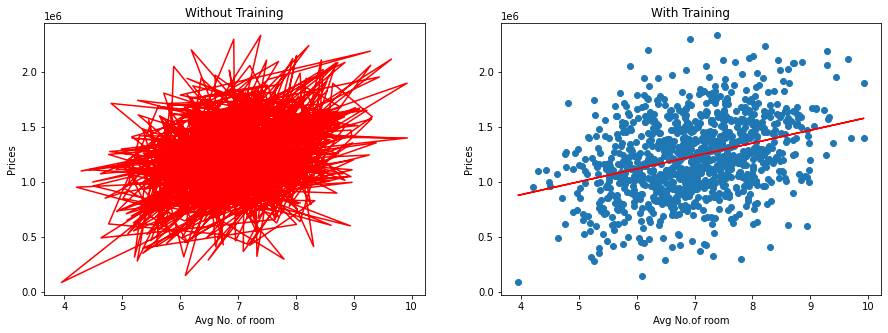

In [16]:
X_train_no_of_rooms,X_test_no_of_rooms,y_train_no_of_rooms,y_test_no_of_rooms=train_test_split(
    X_no_of_rooms,y,test_size=0.2,random_state=3) 
print('X_train={}'.format(X_train_no_of_rooms))
print('y_train={}'.format(y_train_no_of_rooms))
print()

# fitting the model
X_train_no_of_rooms=X_train_no_of_rooms.reshape(-1,1)
re.fit(X_train_no_of_rooms,y_train_no_of_rooms)

print('Coefficient of variance:',re.coef_)
print('Intercept:',re.intercept_)
print()
print('Score for the Training Set:', re.score(X_train_no_of_rooms,y_train_no_of_rooms))

# predicting the output for the taken test set
X_test_no_of_rooms=X_test_no_of_rooms.reshape(-1,1)
y_pred_no_of_rooms=re.predict(X_test_no_of_rooms)

print('Score for the Validating Set:', re.score(X_test_no_of_rooms,y_pred_no_of_rooms))
print()

# Visualisatioin
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
plt.plot(X_test_no_of_rooms,y_test_no_of_rooms,color='red')
plt.xlabel('Avg No. of room')
plt.ylabel('Prices')
plt.title('Without Training')


plt.subplot(1, 2, 2)
plt.scatter(X_test_no_of_rooms,y_test_no_of_rooms)
plt.plot(X_test_no_of_rooms,y_pred_no_of_rooms,color='red')
plt.xlabel('Avg No.of room')
plt.ylabel('Prices')
plt.title('With Training')
plt.show()


X_train=[23624.24893733 38418.05830162 30689.30260383 ... 41199.25222555
 36001.26253261 22875.69333992]
y_train=[1476392.55075533 1364306.768681   1255736.40858762 ... 1450393.53041457
 1660295.79595833 1077754.22596212]

Coefficient of variance: [14.51351797]
Intercept: 709560.1493855594

Score for the Training Set: 0.16849068894064156
Score for the Validating Set: 1.0



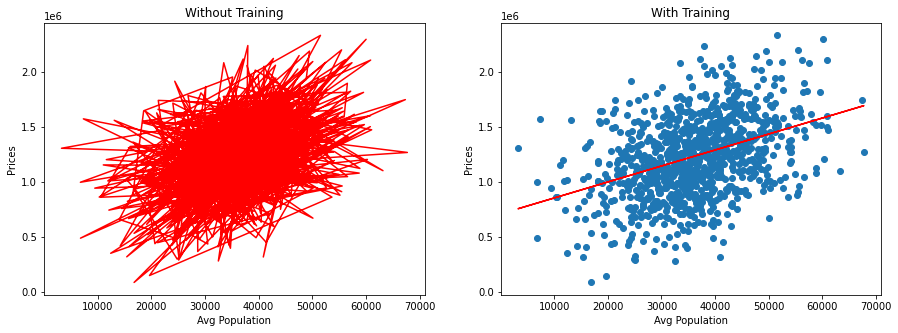

In [17]:
X_train_no_pop,X_test_no_pop,y_train_no_pop,y_test_no_pop=train_test_split(
    X_no_pop,y,test_size=0.2,random_state=3) 
print('X_train={}'.format(X_train_no_pop))
print('y_train={}'.format(y_train_no_pop))
print()

# fitting the model 
X_train_no_pop=X_train_no_pop.reshape(-1,1)
re.fit(X_train_no_pop,y_train_income)

print('Coefficient of variance:',re.coef_)
print('Intercept:',re.intercept_)
print()
print('Score for the Training Set:', re.score(X_train_no_pop,y_train_income))

# predicting the output for the taken test set
X_test_no_pop=X_test_no_pop.reshape(-1,1)
y_pred_no_pop=re.predict(X_test_no_pop)

print('Score for the Validating Set:', re.score(X_test_no_pop,y_pred_no_pop))
print()

# Visualisation
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)

plt.plot(X_test_no_pop,y_test_no_pop,color='red')
plt.xlabel('Avg Population')
plt.ylabel('Prices')
plt.title('Without Training')


plt.subplot(1, 2, 2)
plt.scatter(X_test_no_pop,y_test_no_pop)
plt.plot(X_test_no_pop,y_pred_no_pop,color='red')
plt.xlabel('Avg Population')
plt.ylabel('Prices')
plt.title('With Training')
plt.show()
#

X_train=[2.5  6.45 3.02 ... 4.03 4.08 3.44]
y_train=[1476392.55075533 1364306.768681   1255736.40858762 ... 1450393.53041457
 1660295.79595833 1077754.22596212]

Coefficient of variance: [49400.41583694]
Intercept: 1038414.3623627636

Score for the Training Set: 0.030056645950154337
Score for the Validating Set: 1.0



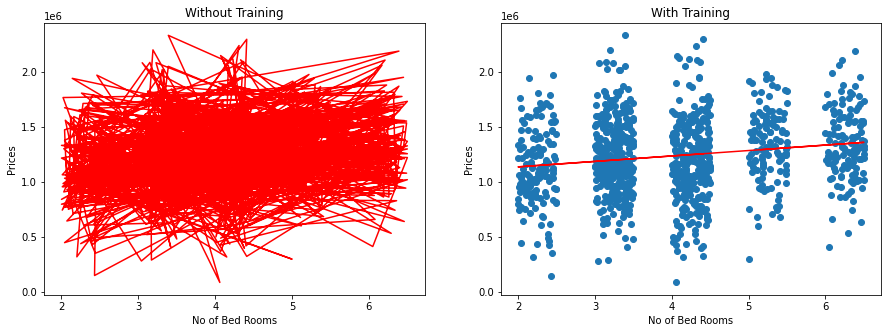

In [18]:
X_train_no_of_bed_rooms,X_test_no_of_bed_rooms,y_train_no_of_bed_rooms,y_test_no_of_bed_rooms=train_test_split(
    X_no_of_bed_rooms,y,test_size=0.2,random_state=3) 
print('X_train={}'.format(X_train_no_of_bed_rooms))
print('y_train={}'.format(y_train_no_of_bed_rooms))
print()

# fitting the model 
X_train_no_of_bed_rooms=X_train_no_of_bed_rooms.reshape(-1,1)
re.fit(X_train_no_of_bed_rooms,y_train_income)

print('Coefficient of variance:',re.coef_)
print('Intercept:',re.intercept_)
print()
print('Score for the Training Set:', re.score(X_train_no_of_bed_rooms,y_train_income))

# predicting the output for the taken test set
X_test_no_of_bed_rooms=X_test_no_of_bed_rooms.reshape(-1,1)
y_pred_no_of_bed_rooms=re.predict(X_test_no_of_bed_rooms)

print('Score for the Validating Set:', re.score(X_test_no_of_bed_rooms,y_pred_no_of_bed_rooms))
print()

# Visualisation
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)

plt.plot(X_test_no_of_bed_rooms,y_test_no_of_bed_rooms,color='red')
plt.xlabel('No of Bed Rooms')
plt.ylabel('Prices')
plt.title('Without Training')


plt.subplot(1, 2, 2)
plt.scatter(X_test_no_of_bed_rooms,y_test_no_of_bed_rooms)
plt.plot(X_test_no_of_bed_rooms,y_pred_no_of_bed_rooms,color='red')
plt.xlabel('No of Bed Rooms')
plt.ylabel('Prices')
plt.title('With Training')
plt.show()



In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3) 
print('X_train:',(X_train))
print('y_train:',(y_train))
print('X_train Shape:',(X_train.shape))
print('y_train Shape:',(y_train.shape))
print()

# fitting the model 
re.fit(X_train,y_train_income)

print('Coefficient of variance:',re.coef_)
print('Intercept:',re.intercept_)
print()
print('Score for the Training Set:', re.score(X_train,y_train_income))

# predicting the output for the taken test set
y_pred=re.predict(X_test)
y_pred=y_pred.reshape(1000,1)
dd=np.hstack((X_test,y_pred))
dd=pd.DataFrame(dd,columns=['Avg. Area Income',
             'Avg. Area House Age',
             'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms',
             'Area Population','Price'])
print('Score for the Validating Set:', re.score(X_test,y_pred))
print()



X_train: [[7.90952792e+04 6.66680887e+00 6.73853368e+00 2.50000000e+00
  2.36242489e+04]
 [6.03259859e+04 6.81245207e+00 7.64743861e+00 6.45000000e+00
  3.84180583e+04]
 [6.80618143e+04 5.77691241e+00 8.06764570e+00 3.02000000e+00
  3.06893026e+04]
 ...
 [7.24881597e+04 5.64363914e+00 8.20529421e+00 4.03000000e+00
  4.11992522e+04]
 [8.85080535e+04 6.41739743e+00 5.81124793e+00 4.08000000e+00
  3.60012625e+04]
 [7.11464893e+04 6.65175544e+00 5.91497724e+00 3.44000000e+00
  2.28756933e+04]]
y_train: [1476392.55075533 1364306.768681   1255736.40858762 ... 1450393.53041457
 1660295.79595833 1077754.22596212]
X_train Shape: (4000, 5)
y_train Shape: (4000,)

Coefficient of variance: [2.14390878e+01 1.65080344e+05 1.21791417e+05 1.35158996e+03
 1.51184366e+01]
Intercept: -2626568.2150450456

Score for the Training Set: 0.9186771568025791
Score for the Validating Set: 1.0

